In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Amit Ranjan\\Desktop\\Data Science\\Superstore sales\\Superstore.csv", encoding='windows-1252')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

🤔Observations:
1. Date Columns: We need to convert dtype of "order Date - object & Ship Date - object" to datetime object.
2. Postal Code: Postal Code's dtype is int64, where Python will read as number 
   eg. if PC is 02345, it will be read as 2345, so will need to convert it as object.

In [5]:
df['Order Date']= pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date']= pd.to_datetime(df['Ship Date'], dayfirst=True)

#also,

df['Postal Code'] = df['Postal Code'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
#Checking if there are duplicates in df
print(f"Number of Duplicate Rows found: {df.duplicated().sum()}\n"
     f"Duplicates in Order ID: {df['Order ID'].duplicated().sum()}")

Number of Duplicate Rows found: 0
Duplicates in Order ID: 4985


📝Insights:
1. Duplicate Rows found: There are no accidental copies in this file. No one copied and pasted the same line twice.
2. Duplicates in Order ID (4985): This is normal, 
    when we order 2-3 products together eg-Laptop, Mouse etc, there this is created for transactional level.

In [9]:
df[['Sales','Discount','Profit']].describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


🤔Observations:
1. The "Smoking Gun" (Profit Min: -6599.97): This proves the fear is real. 
    They are losing significant money on specific transactions.
2. Discount Max: 0.8: Discounts of 80% are extremely high. 
    It is highly probable that the products with these deep discounts are the ones driving the negative profit.
3. High Variance (Sales): The mean sales is 229, but the max is 22,638. 
    Most orders are small, but a few massive orders (outliers) skew the data.

In [11]:
#Calculating Profit Ratio

print(f"{'*' * 10} "
    f"Calculating Profit Ratio "
    f"{'*' * 10}\n"
)

df['Profit Ratio %'] = df['Profit']/df['Sales']*100

#to group data for evaluation, Year and Month of Order date is required

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()


#verification for new columns

print(df[['Order Date', 'Year', 'Month', 'Profit Ratio %', 'Profit', 'Sales']].head(5))

********** Calculating Profit Ratio **********

  Order Date  Year     Month  Profit Ratio %    Profit     Sales
0 2013-11-09  2013  November           16.00   41.9136  261.9600
1 2013-11-09  2013  November           30.00  219.5820  731.9400
2 2013-06-13  2013      June           47.00    6.8714   14.6200
3 2012-10-11  2012   October          -40.00 -383.0310  957.5775
4 2012-10-11  2012   October           11.25    2.5164   22.3680


--------------------Key Performance Indicator: 1️⃣--------------------
**********Year-over-Year (YoY) Sales Chart: business growing or shrinking**********

**YEARLY SALES**
    Year        Sales   Growth %
0  2011  484247.4981        NaN
1  2012  470532.5090  -2.832227
2  2013  608473.8300  29.316002
3  2014  733947.0232  20.620968 



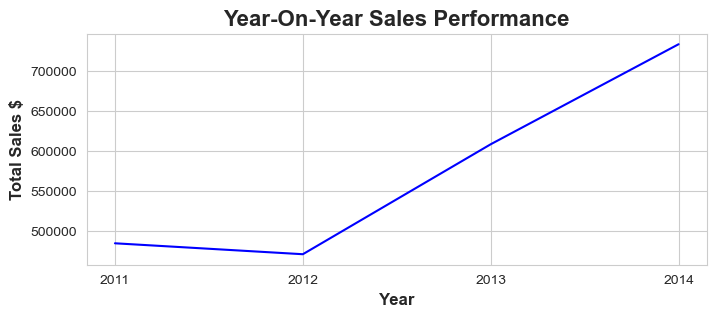



**********Year-over-Year (YoY) Growth Rate %**********



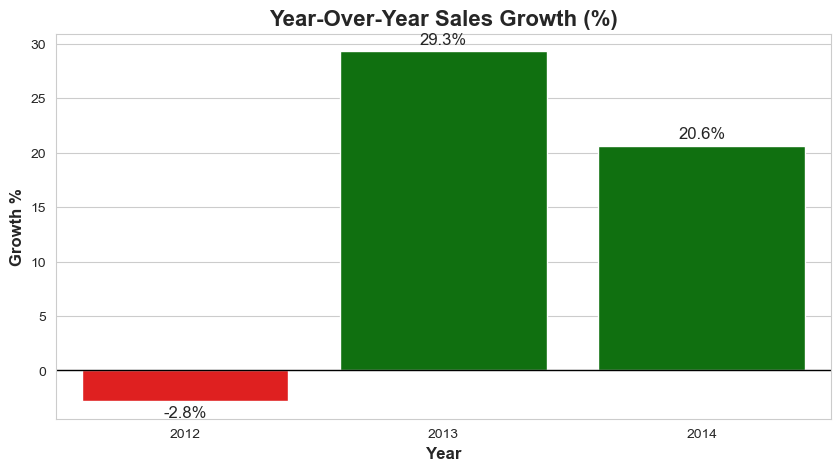

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print(
    f"{'-'*20}"
    f"Key Performance Indicator: 1️⃣"
    f"{'-'*20}\n"
    f"{'*'*10}"
    f"Year-over-Year (YoY) Sales Chart: business growing or shrinking"
    f"{'*'*10}\n"
)

yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
yearly_sales['Growth %'] = yearly_sales['Sales'].pct_change() * 100
print("**YEARLY SALES**\n", yearly_sales, "\n")

plt.figure(figsize=(8,3))
sns.set_style("whitegrid")

ax = sns.lineplot(data = yearly_sales,
                  x = 'Year',
                  y = 'Sales',
                  color='blue')
plt.title("Year-On-Year Sales Performance", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.xticks(yearly_sales['Year'])
plt.ylabel("Total Sales $", fontsize=12, fontweight='bold')
plt.show()

print("\n")

print(
    f"{'*'*10}"
    f"Year-over-Year (YoY) Growth Rate %"
    f"{'*'*10}\n"
)

plot_data = yearly_sales.dropna()

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Color logic: Green if > 0, else Red
colors = ['green' if x > 0 else 'red' for x in plot_data['Growth %']]

ax = sns.barplot(data=plot_data, x='Year', y='Growth %', palette=colors, hue='Year', legend=False)

# Add labels
plt.title('Year-Over-Year Sales Growth (%)', fontsize=16, fontweight='bold')
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('Growth %', fontsize=12,fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')


# Add the % numbers on top of the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', fontsize=12, padding=3)

plt.show()

📝Insights:
1. The Trend is UP (Growth Confirmed): 2012 to 2014.
2. The Trend "Stumbled" in 2012.
3. Yes, your sales are growing aggressively (+20% YoY roughly).

--------------------Key Performance Indicator: 2️⃣--------------------
**********Trend of Profit & Profit Ratio % Year-On-Year**********

Year
2011    49543.9741
2012    61618.6037
2013    81726.9308
2014    93507.5131
Name: Profit, dtype: float64 

Year
2011    11.811180
2012    11.756681
2013    12.959406
2014    11.616225
Name: Profit Ratio %, dtype: float64 



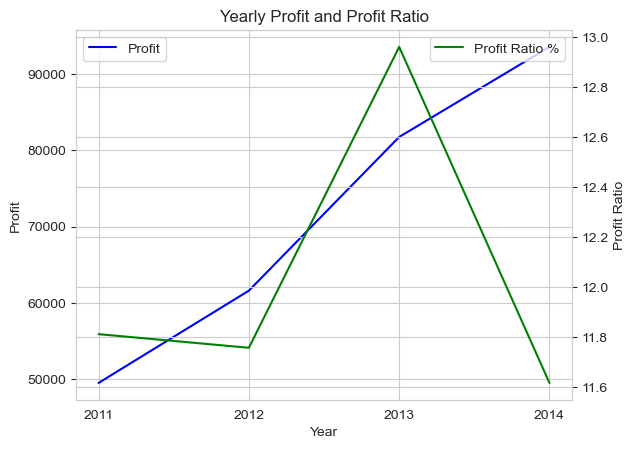

In [14]:
print(
    f"{'-'*20}"
    f"Key Performance Indicator: 2️⃣"
    f"{'-'*20}\n"
    f"{'*'*10}"
    f"Trend of Profit & Profit Ratio % Year-On-Year"
    f"{'*'*10}\n"
)

yearly_profit = df.groupby('Year')['Profit'].sum()
yearly_profit_ratio = df.groupby('Year')['Profit Ratio %'].mean()

print(yearly_profit, "\n")
print(yearly_profit_ratio, "\n")

fig, ax1 = plt.subplots()
ax1.plot(yearly_profit.index,
         yearly_profit.values,
         color='blue',
        label='Profit')

ax1.set_xlabel('Year')
ax1.set_ylabel('Profit')

ax2 = ax1.twinx()
ax2.plot(yearly_profit_ratio.index,
         yearly_profit_ratio.values,
         color='green',
        label='Profit Ratio %')

ax2.set_ylabel('Profit Ratio')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Yearly Profit and Profit Ratio')
plt.xticks(yearly_sales['Year'])

plt.show()

📝Insights:
1. Profits are consistently increasing (2011–2014)
2. Profit Ratio peaks in 2013, then drops sharply in 2014
3. 2013 = Best quality growth year: Better pricing, Cost control, Efficient operations.
4. 2014 = Volume-driven growth with margin pressure: Sales increased but lower margin (Growth is less healthy).
5. **********More money was made, but with declining efficiency************

--------------------Key Performance Indicator: 3️⃣--------------------
**********Regional Profit Analysis**********

    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489 



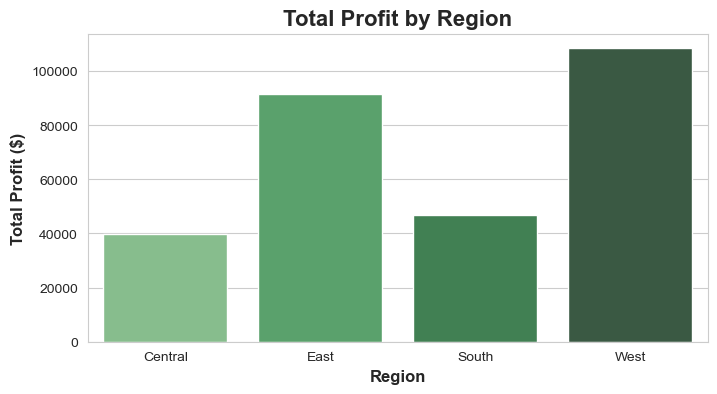

In [16]:
print(
    f"{'-'*20}"
    f"Key Performance Indicator: 3️⃣"
    f"{'-'*20}\n"
    f"{'*'*10}"
    f"Regional Profit Analysis"
    f"{'*'*10}\n"
)


regional_analysis = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

print(regional_analysis, "\n")

plt.figure(figsize=(8,4))

sns.barplot(data=regional_analysis, x= 'Region', y = 'Profit', palette='Greens_d', hue='Region', legend=False)

plt.title('Total Profit by Region', fontsize=16, fontweight='bold')
plt.ylabel('Total Profit ($)', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')

plt.show()

📝Insights:
1. The Central region usually has the shortest bar (lowest profit)
2. The "Powerhouse" (West Region):You will typically see the West region with the tallest bar (highest profit).

--------------------Key Performance Indicator: 4️⃣--------------------
**********Regional Profit Ratio % Analysis**********

Region
Central   -10.407294
South      16.351903
East       16.722696
West       21.948662
Name: Profit Ratio %, dtype: float64 



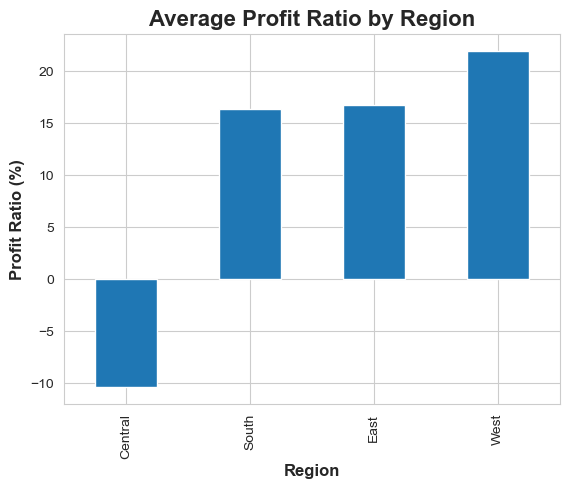

In [18]:
print(
    f"{'-'*20}"
    f"Key Performance Indicator: 4️⃣"
    f"{'-'*20}\n"
    f"{'*'*10}"
    f"Regional Profit Ratio % Analysis"
    f"{'*'*10}\n"
)


regional_margin_analysis = df.groupby('Region')['Profit Ratio %'].mean().sort_values()
print(regional_margin_analysis, "\n")


plt.figure()
regional_margin_analysis.plot(kind='bar')
plt.title('Average Profit Ratio by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Profit Ratio (%)', fontsize=12, fontweight='bold')

plt.show()

--- WORST PERFORMERS IN CENTRAL REGION ---
  Sub-Category       Sales     Profit
0  Furnishings  15254.3700 -3906.2168
1       Tables  39154.9710 -3559.6504
2   Appliances  23582.0330 -2638.6175
3    Bookcases  24157.1768 -1997.9043
4     Machines  26797.3840 -1486.0666


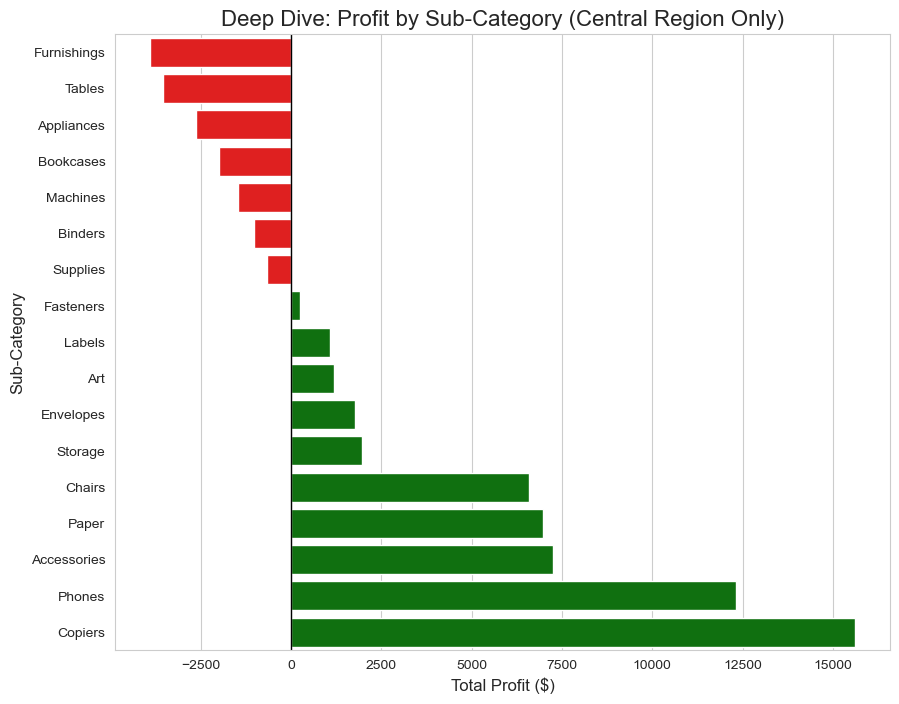

In [19]:
central_data = df[df['Region'] == 'Central']

# 2. Analyze Profitability: Group by Sub-Category, Sum Profit, and Sort
central_analysis = central_data.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=True).reset_index()

# 3. View the specific "Loss Makers" in the West
print("--- WORST PERFORMERS IN CENTRAL REGION ---")
print(central_analysis.head(5))

# 4. Visualization: Horizontal Bar Chart
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Color Logic: Red for Loss, Green for Profit
colors = ['red' if x < 0 else 'green' for x in central_analysis['Profit']]

sns.barplot(data= central_analysis, 
            y='Sub-Category', 
            x='Profit', 
            palette=colors, 
            hue='Sub-Category', 
            legend=False)

# 5. Add Labels
plt.title('Deep Dive: Profit by Sub-Category (Central Region Only)', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.axvline(x=0, color='black', linewidth=1)
plt.show()

📝Insights:
1. West: The best-performing region: Highest Sale, Highest Profit, Highest Profit Ratio.
2. Central: The Red Flag, Decent Sale Volume, Very Low profit, Negative poor profit ratio,
    Possible reasons: Heavy discounts, High logistics / returns, Wrong product mix, Poor operational efficiency

--------------------Key Performance Indicator: 5️⃣--------------------
**********Problem Identification (Losing Money): Profit by Sub-Category chart**********



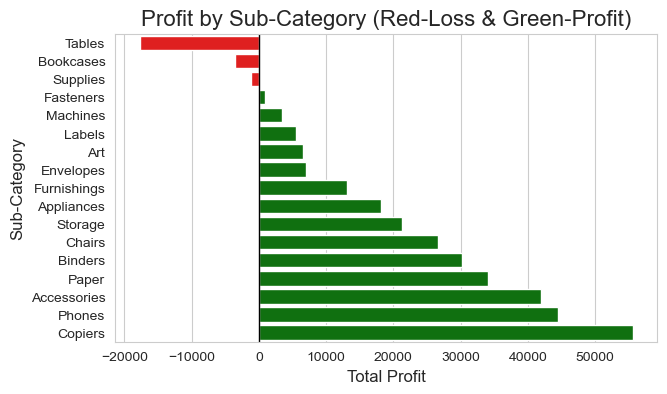

In [21]:
# Identifying money losers:Smoking Gun
print(
    f"{'-'*20}"
    f"Key Performance Indicator: 5️⃣"
    f"{'-'*20}\n"
    f"{'*'*10}"
    f"Problem Identification (Losing Money): Profit by Sub-Category chart"
    f"{'*'*10}\n"
)


# groping profit and sales by sub-category
category_analysis = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=True).reset_index()

#chart
plt.figure(figsize=(7,4))
sns.set_style("whitegrid")

# We define a custom color palette: Red for negative profit, Green for positive.
colors = ['red' if x < 0 else 'green' for x in category_analysis['Profit']]

sns.barplot(data=category_analysis, y='Sub-Category', x='Profit', palette=colors, hue='Sub-Category', legend=False)
plt.title('Profit by Sub-Category (Red-Loss & Green-Profit)', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)

# Vertical line between positive and negative
plt.axvline(x=0, color='black', linewidth=1)

plt.show()

📝Insights:
1. Sub-Category- Table & Bookcases are the worst offenders in this dataset

--------------------Key Performance Indicator: 6️⃣--------------------
**********Correlation Analysis: High Discount -> Negative Profit**********

    Discount       Sales      Profit
0       0.00  226.742074   66.900292
1       0.10  578.397351   96.055074
2       0.15  529.971567   27.288298
3       0.20  209.076940   24.702572
4       0.30  454.742974  -45.679636
5       0.32  536.794770  -88.560656
6       0.40  565.134874 -111.927429
7       0.45  498.634000 -226.646464
8       0.50  892.705152 -310.703456
9       0.60   48.150000  -43.077212
10      0.70   97.177708  -95.874060
11      0.80   56.545853 -101.796797




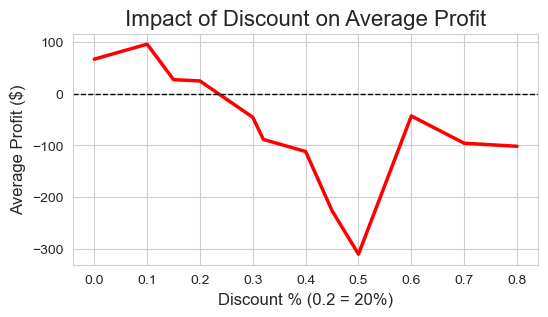

In [23]:
# Discount Max: 0.8: Discounts of 80% are extremely high
print(
    f"{'-'*20}"
    f"Key Performance Indicator: 6️⃣"
    f"{'-'*20}\n"
    f"{'*'*10}"
    f"Correlation Analysis: High Discount -> Negative Profit"
    f"{'*'*10}\n"
)

# groping profit and sales by Discounts: Average frofit on each discount levels
discount_analysis = df.groupby('Discount')[['Sales', 'Profit']].mean().reset_index()

print(discount_analysis)
print("\n")

#chart
plt.figure(figsize=(6,3))


sns.lineplot(data=discount_analysis, x='Discount', y='Profit', markers='o', color='red', linewidth=2.5)
plt.title('Impact of Discount on Average Profit', fontsize=16)
plt.xlabel('Discount % (0.2 = 20%)', fontsize=12)
plt.ylabel('Average Profit ($)', fontsize=12)

# horizontal line at line at profit=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.show()

📝Insights:
1. As long as the discount is 20% (0.2) or less, the company makes money.
2. Look at the massive dip at 0.5. The average loss per sale here is nearly -$300.
3. Interestingly, profit at 10% discount (0.1) is actually higher than at 0%

--------------------Key Performance Indicator: 7️⃣--------------------
**********Long Tail Distribution: Massive difference b/w Mean &  Max of sales**********



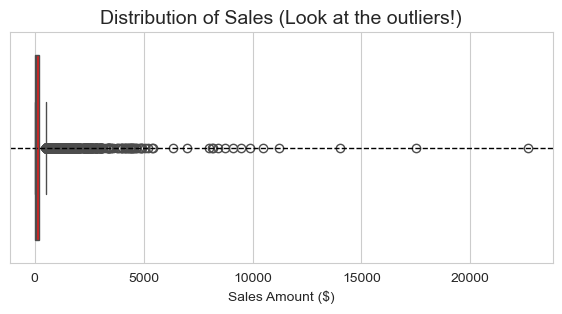


--- The Top 5 Massive Orders ---
     Order Date Sub-Category      Sales     Profit
2697 2011-03-18     Machines  22638.480 -1811.0784
6826 2013-10-03      Copiers  17499.950  8399.9760
8153 2014-03-24      Copiers  13999.960  6719.9808
2623 2014-10-23      Copiers  11199.968  3919.9888
4190 2014-11-18      Copiers  10499.970  5039.9856
9039 2013-12-18      Binders   9892.740  4946.3700


In [25]:
# Long Tail" distribution: massive difference between the Mean ($229) and the Max ($22,638)
print(
    f"{'-'*20}"
    f"Key Performance Indicator: 7️⃣"
    f"{'-'*20}\n"
    f"{'*'*10}"
    f"Long Tail Distribution: Massive difference b/w Mean &  Max of sales"
    f"{'*'*10}\n"
)

#chart
plt.figure(figsize=(7,3))


sns.boxplot(x=df['Sales'],color='red')
plt.title('Distribution of Sales (Look at the outliers!)', fontsize=14)
plt.xlabel('Sales Amount ($)')

# horizontal line at line at profit=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.show()

#investigation around top 5 massive sales

top_sales = df[['Order Date','Sub-Category', 'Sales', 'Profit']].sort_values('Sales', ascending=False).head(6)

print("\n--- The Top 5 Massive Orders ---")
print(top_sales)

📝Insights:
1. The top item (Index 2697) sold for 22,638.48, Despite the massive revenue, the company lost 1,811 on this single transaction.
2. Sub-Category - Copiers (The Real Heroes), Index-6826 made almost 50% of margin.
3. Copiers" are the most valuable sub-category for high-ticket items. "Machines" are risky.

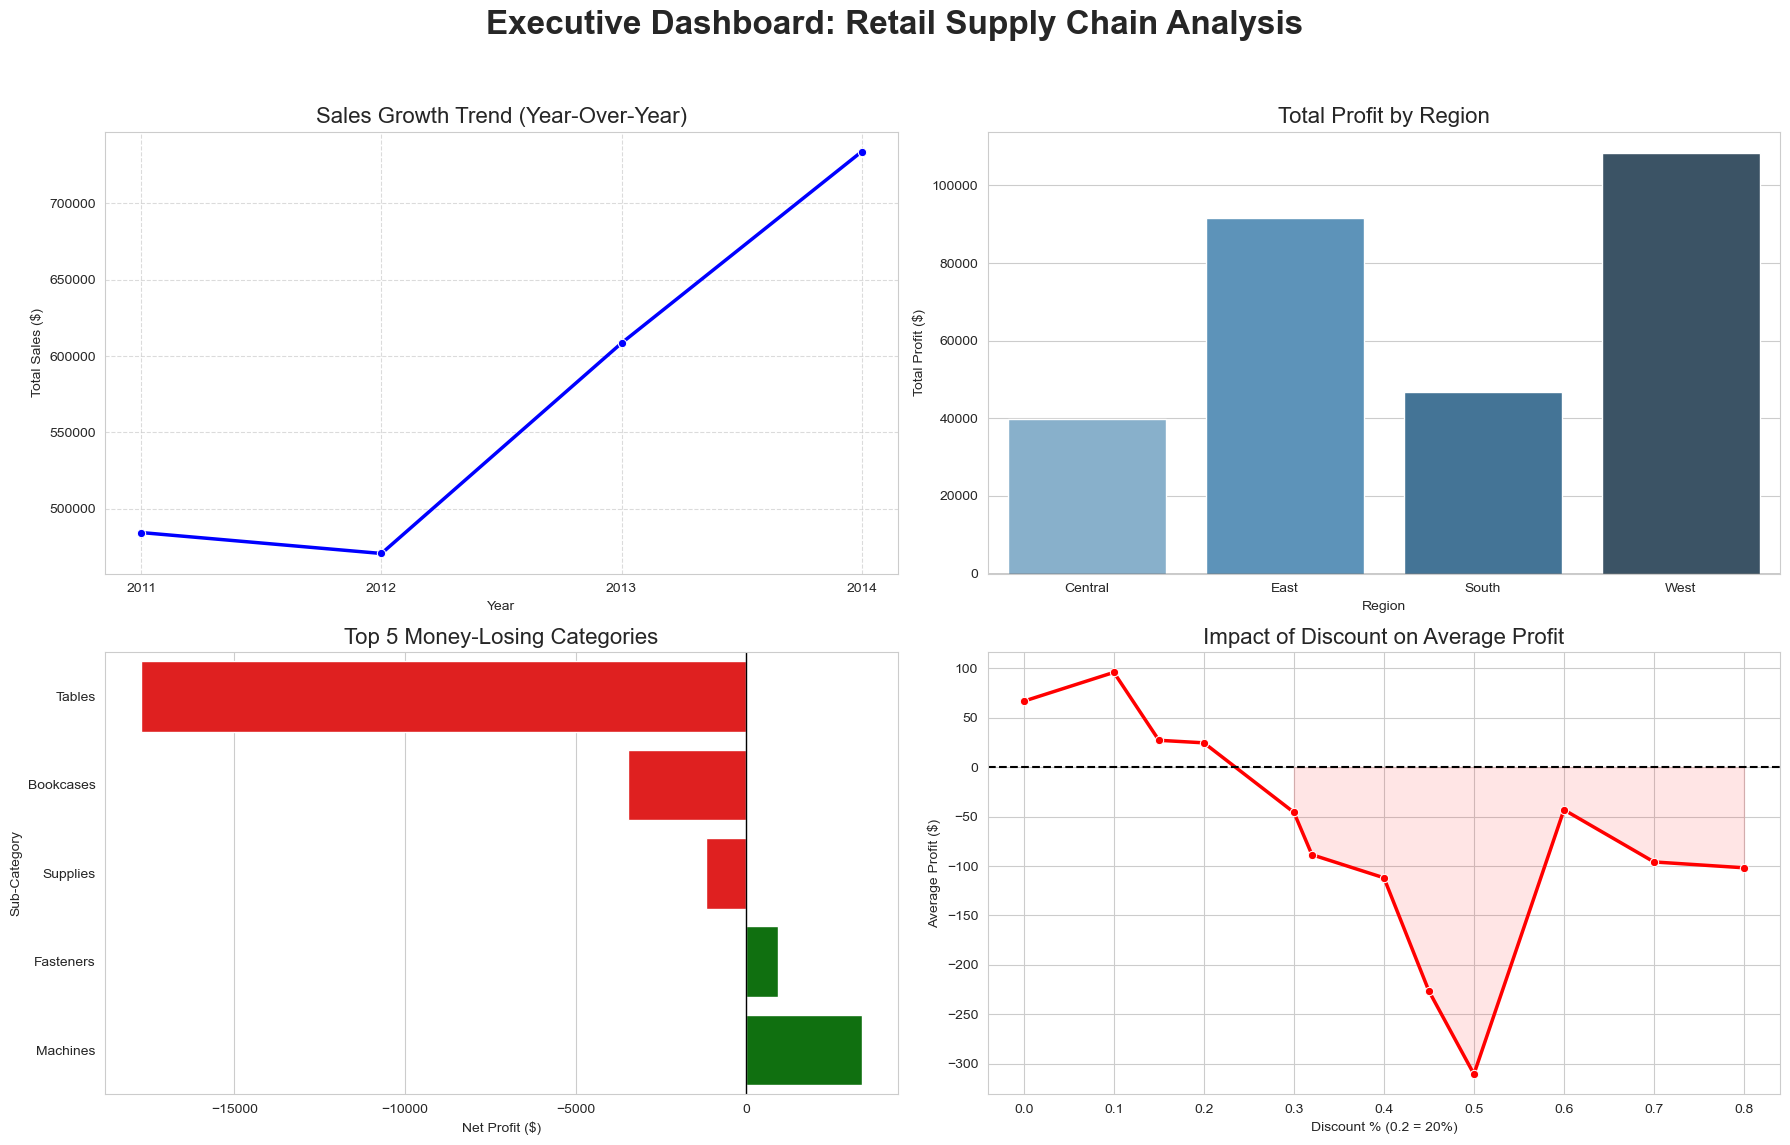

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

bottom_5 = category_analysis.head(5) # Get the 5 worst performers

# --- STEP 2: BUILD THE DASHBOARD GRID ---
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Add a Super Title for the whole Dashboard
fig.suptitle('Executive Dashboard: Retail Supply Chain Analysis', fontsize=24, fontweight='bold')


# --- CHART 1: Sales Growth (Top Left) ---
sns.lineplot(ax=axes[0, 0], data=yearly_sales, x='Year', y='Sales', marker='o', color='blue', linewidth=2.5)
axes[0, 0].set_title('Sales Growth Trend (Year-Over-Year)', fontsize=16)
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].set_xticks(yearly_sales['Year'])
axes[0, 0].grid(True, linestyle='--', alpha=0.7)
# Format Y-axis to currency


# --- CHART 2: Regional Profitability (Top Right) ---
sns.barplot(ax=axes[0, 1], data=regional_analysis, x='Region', y='Profit', hue='Region', palette='Blues_d', legend=False)
axes[0, 1].set_title('Total Profit by Region', fontsize=16)
axes[0, 1].set_ylabel('Total Profit ($)')
axes[0, 1].axhline(0, color='black', linewidth=1)


# --- CHART 3: The "Bleeding" Products (Bottom Left) ---
# Color logic: Red for loss
colors_bot = ['red' if x < 0 else 'green' for x in bottom_5['Profit']]
sns.barplot(ax=axes[1, 0], data=bottom_5, x='Profit', y='Sub-Category', hue='Sub-Category', palette=colors_bot, legend=False)
axes[1, 0].set_title('Top 5 Money-Losing Categories', fontsize=16)
axes[1, 0].set_xlabel('Net Profit ($)')
axes[1, 0].axvline(0, color='black', linewidth=1)


# --- CHART 4: The Discount Trap (Bottom Right) ---
sns.lineplot(ax=axes[1, 1], data=discount_analysis, x='Discount', y='Profit', color='red', marker='o', linewidth=2.5)
axes[1, 1].set_title('Impact of Discount on Average Profit', fontsize=16)
axes[1, 1].set_xlabel('Discount % (0.2 = 20%)')
axes[1, 1].set_ylabel('Average Profit ($)')
axes[1, 1].axhline(0, color='black', linestyle='--') # The "Break-even" line

# Fill the area below zero in red to emphasize danger
axes[1, 1].fill_between(discount_analysis['Discount'], discount_analysis['Profit'], 0, where=(discount_analysis['Profit'] < 0), color='red', alpha=0.1)


# --- STEP 3: FINALIZE LAYOUT ---
# Tight_layout automatically adjusts spacing so titles don't overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

# Save the dashboard as a high-quality image
plt.savefig('Executive_Dashboard.png', dpi=300)

plt.show()

# 📊 Executive Summary: Retail Supply Chain Analysis

**Analyst:** AMIT RANJAN
**Date:** December 17, 2025

---

### **1. High-Level Performance**
* **Sales Growth:** The company is seeing strong top-line growth. Sales jumped **+29% in 2013** and continued to grow **+20% in 2014**.
* **Regional Efficiency:** The **West Region** is our profit engine, delivering the highest margins. The **Central Region** is currently our biggest liability, generating high sales but almost zero profit.

### **2. Critical Issues Identified**
* **The "Table" Problem:** "Tables" are the single largest source of loss across the company. This is a systemic product issue, as they are slight profitable even in our best-performing region (West).
* **The Discount Trap:** Our data confirms that **discounts above 20%** consistently result in net losses. The massive $22k "Machine" sale resulted in a $1,800 loss due to this factor.

### **3. Strategic Recommendations**
1.  **Stop Deep Discounts:** Implement a hard cap on discretionary discounts at **20%**. Any discount higher than this requires authentic approval.
2.  **Restructure "Tables":** Either increase prices on Tables by 10% to cover shipping or stop selling them in the Central Region immediately.
3.  **Replicate the West:** Investigate the shipping contracts used in the West and apply those terms to the Central region to fix the profit bleed.

---